In [35]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [49]:
folder = '../../results/'

figs = os.path.join(folder, 'figs')
file = os.path.join(folder, 'raw-results.csv')

df = pd.read_csv(file)

sns.set(font_scale=1.6)
sns.set_style("ticks")

sns.set_context("paper", font_scale=2.6)   

In [37]:
df_invo = df[df['Experiment'] == 'LOOP']

In [38]:
bench = df_invo[df_invo['Class'] == 'LongCompressionBenchmark']
bench = bench[bench['Method'] == 'readContinuous']

<Figure size 432x288 with 0 Axes>

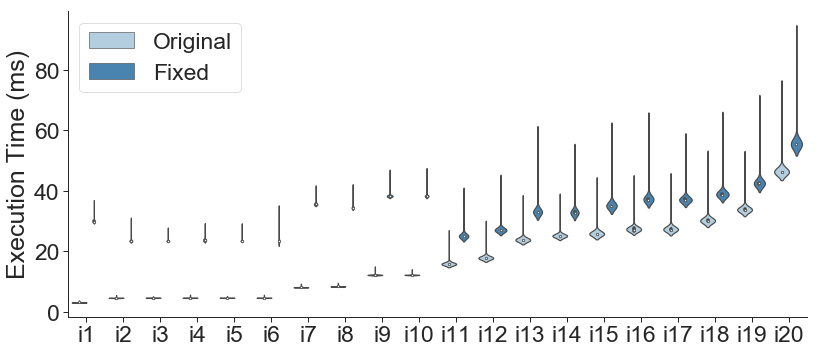

In [50]:
%matplotlib inline
plt.clf()

#sns.set(font_scale=2.0)
#sns.set_style("ticks")

import math

bench = df_invo[df_invo['Class'] == 'LongCompressionBenchmark']
bench = bench[bench['Method'] == 'readContinuous']
bench = bench.sort_values(by='Score')
bench = bench.replace('fixed_full', 'Fixed')
bench = bench.replace('original', 'Original')

#headers_table = pd.pivot_table(data=headers_bench, values='Score', index=['Version','Method', 'Iteration', 'Fork', 'Trial'])
cat = sns.catplot(data=bench, x='Full params', y='Score', hue='Version', 
                  ci=95, kind='violin', sharey=False, legend_out=False, legend=True, aspect=2.4, palette='Blues')
cat.set_axis_labels("", "Execution Time (ms)")
cat.set_xticklabels(['i' + str(i) for i in list(range(1,21))])
cat.set_titles("{col_name}")

#plt.legend(bbox_to_anchor=(0, .95), loc=2, borderaxespad=0.)
plt.legend(loc='upper left')
#plt.xticks(fontsize=20)
#plt.show()
plt.tight_layout()
plt.savefig(os.path.join(figs, 'druid-longcompressionbenchmark-continuous.pdf'))



<Figure size 432x288 with 0 Axes>

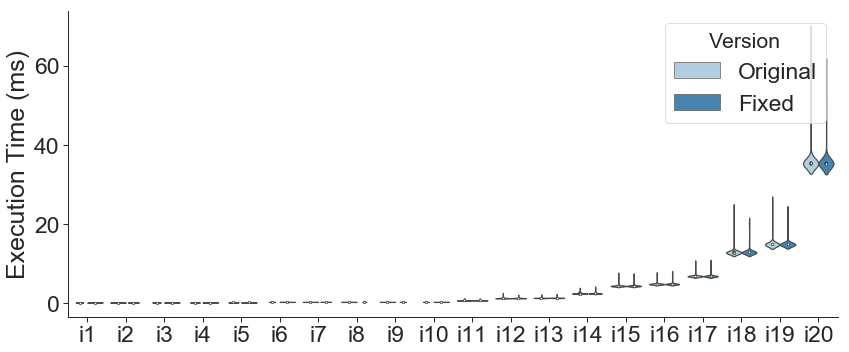

In [40]:
%matplotlib inline
plt.clf()

sns.set_style("ticks")

import math

bench = df_invo[df_invo['Class'] == 'LongCompressionBenchmark']
bench = bench[bench['Method'] == 'readSkipping']
bench = bench.sort_values(by='Score')
bench = bench.replace('fixed_full', 'Fixed')
bench = bench.replace('original', 'Original')

#headers_table = pd.pivot_table(data=headers_bench, values='Score', index=['Version','Method', 'Iteration', 'Fork', 'Trial'])
cat = sns.catplot(data=bench, x='Full params', y='Score', hue='Version', 
                  ci=95, kind='violin', sharey=False, legend_out=False, legend=True, aspect=2.4, palette='Blues')
cat.set_axis_labels("", "Execution Time (ms)")
cat.set_xticklabels(['i' + str(i) for i in list(range(1,21))])
cat.set_titles("{col_name}")

#plt.legend(bbox_to_anchor=(-2.3, .95), loc=2, borderaxespad=0.)
#plt.show()
plt.tight_layout()
plt.savefig(os.path.join(figs, 'druid-longcompressionbenchmark-skipping.pdf'))

In [41]:
aggr_file = os.path.join(folder, 'summarized-results.csv')

aggr_df = pd.read_csv(aggr_file)
aggr_invo = aggr_df[aggr_df['Experiment'] == 'INVO']

### Heatmap plots

In [42]:
bench = aggr_invo[aggr_invo['Class'] == 'HeadersBenchmark']

table = pd.pivot_table(data=bench, index='Method', columns='Full params', values='New Factor')

In [43]:
import matplotlib.colors as colors

pos = np.linspace(1, 5, 20)
neg = np.linspace(-5, -1, 20)

bounds = np.append(neg, 0) # Add zero
bounds = np.concatenate((bounds, pos))
bounds = [-5,-4,-3,-2,-1.0,1.0,2,3,4,5]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.clf()
clrs = sns.color_palette("RdBu_r", 50)

sns.heatmap(data=table,annot=False, fmt="2.0%", center=0, norm=norm, cmap=clrs, robust=True, linewidths=.5, vmin=-3, vmax=3)

plt.show()

NameError: name 'np' is not defined